<a href="https://colab.research.google.com/github/garypapa/ML/blob/main/Exercise_3_Papadopoulou_Garyfallia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import yfinance as yf
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Load Data

In [ ]:
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period="5y").reset_index(drop=False)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-03 00:00:00-05:00,94.050003,94.050003,93.290001,93.550003,0,0.0,0.0
1,2020-11-04 00:00:00-05:00,93.089996,94.300003,93.089996,93.410004,0,0.0,0.0
2,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,0,0.0,0.0
3,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
4,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2025-10-28 00:00:00-04:00,98.750000,98.949997,98.570000,98.690002,0,0.0,0.0
1254,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001,0,0.0,0.0
1255,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,0,0.0,0.0
1256,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0


In [ ]:
df = df.drop(columns=['Volume', 'Dividends', 'Stock Splits'])
df.head()


,Date,Open,High,Low,Close
0,2020-11-03 00:00:00-05:00,94.050003,94.050003,93.290001,93.550003
1,2020-11-04 00:00:00-05:00,93.089996,94.300003,93.089996,93.410004
2,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
3,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
4,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003


# Question 1

In [ ]:
fig = px.line(
    df,
    x='Date',
    y=['Open', 'High', 'Low', 'Close']
)

fig.update_layout(
    width=1000,
    height=600,
    legend_title_text='Price Type'
)

fig.show()

#Question 2

The time series is non-stationary, because the value changes over time, showing clear upward and downward trends. For example, we see a strong rise until mid-2022, followed by a steady decline and several fluctuations afterward, indicating that the average value is not stable over time.

#Question 3

If we train a Regressor on non-stationary data, it can make bad predictions because the values keep changing over time. Here, the USD goes up until mid-2022 and then goes down again, so the model would get confused and not be able to predict future prices well.

#Question 4

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
usd_jun_jul_2025 = df[(df['Date'] >= '2025-06-01') & (df['Date'] <= '2025-07-31')]
usd_jun_jul_2025

,Date,Open,High,Low,Close
1150,2025-06-02 00:00:00-04:00,99.410004,99.419998,98.610001,98.699997
1151,2025-06-03 00:00:00-04:00,98.589996,99.330002,98.580002,99.250000
1152,2025-06-04 00:00:00-04:00,99.180000,99.389999,98.669998,98.790001
1153,2025-06-05 00:00:00-04:00,98.800003,98.940002,98.349998,98.739998
1154,2025-06-06 00:00:00-04:00,98.699997,99.360001,98.660004,99.190002
1155,2025-06-09 00:00:00-04:00,99.199997,99.230003,98.820000,98.940002
1156,2025-06-10 00:00:00-04:00,98.980003,99.389999,98.860001,99.050003
1157,2025-06-11 00:00:00-04:00,98.959999,99.220001,98.529999,98.629997
1158,2025-06-12 00:00:00-04:00,98.459999,98.519997,97.599998,97.919998
1159,2025-06-13 00:00:00-04:00,97.809998,98.589996,97.620003,98.180000


In [ ]:
fig = px.line(
    usd_jun_jul_2025,
    x='Date',
    y='Close',
)

fig.update_layout(
    width=1000,
    height=500,
    xaxis_title='Date',
    yaxis_title='Close Price',
    showlegend=False
)

fig.show()

Between June and July 2025, the USD showed a clear downward trend, reaching its lowest point around July 2, 2025. After that, it started to recover again by the end of the month. This short-term drop can be explained by economic uncertainty in the U.S., such as concerns about trade policies and market reactions to potential changes in interest rates, which temporarily reduced investor confidence in the dollar.

#Question 5

It is not possible to accurately predict tomorrow's close value using only today's data, because the USD depends on many external factors like news and market events. Therefore, there is no fixed mathematical function that can exactly describe this relationship.

#Question 6

No, a random split doesn’t make sense for time series data, because the data points are time-dependent. If we shuffle past values randomly, the model would lose the natural time order needed to learn trends.

#Question 7

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

train_df = df[df['Date'] < '2024-01-01']
test_df = df[(df['Date'] >= '2024-01-01') & (df['Date'] < '2025-01-01')]

train_df = train_df.drop(columns=['Date'])
test_df = test_df.drop(columns=['Date'])

train_df.shape, test_df.shape


((794, 4), (252, 4))

#Question 8

In [ ]:
def create_timeframes(df, window_size):
    X, y = [], []

    df['Target'] = df['Close'].shift(-1)

    for i in range(len(df) - window_size - 1):
        X.append(df.iloc[i:i+window_size][['Open', 'High', 'Low', 'Close']].values)
        y.append(df.iloc[i+window_size]['Target'])

    return np.array(X), np.array(y)

In [ ]:
window_size = 3
x_train, y_train = create_timeframes(train_df, window_size)
x_test, y_test = create_timeframes(test_df, window_size)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(790, 3, 4) (790,)
(248, 3, 4) (248,)


#Question 9

If we want to predict only the next day, the timeframe (N) should be small, like 3–5 days, since recent values are more relevant.
But if we want to predict a longer horizon, such as one month ahead, we should use a larger N — for example around 20–30 days, so the model can capture longer trends and patterns.

#Question 10

In [ ]:
window_size = 5

x_train, y_train = create_timeframes(train_df.copy(), window_size)
x_test, y_test = create_timeframes(test_df.copy(), window_size)

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

print("1st input x_train\n", x_train[0])

x_train (788, 20)
y_train (788,)
x_test (246, 20)
y_test (246,)
1st input x_train
 [94.05000305 94.05000305 93.29000092 93.55000305 93.08999634 94.30000305
 93.08999634 93.41000366 93.33999634 93.55000305 92.48999786 92.52999878
 92.56999969 92.81999969 92.18000031 92.23000336 92.23999786 92.95999908
 92.12999725 92.73000336]


#Question 11

a) Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr = lr.predict(x_test)

b) Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(random_state=0)
rf.fit(x_train, y_train)
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

c) Bagging Regressor (using Linear Regression)

In [ ]:
bag = BaggingRegressor(estimator=LinearRegression(), random_state=0)
bag.fit(x_train, y_train)
y_train_pred_bag = bag.predict(x_train)
y_test_pred_bag = bag.predict(x_test)

d) XGBoost Regressor

In [ ]:
xgb = XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.1)
xgb.fit(x_train, y_train)
y_train_pred_xgb = xgb.predict(x_train)
y_test_pred_xgb = xgb.predict(x_test)

e) Stacking Regressor (Linear + Decision Tree)

In [ ]:
stack = StackingRegressor(
    estimators=[('lr', LinearRegression()), ('dt', DecisionTreeRegressor(random_state=0))],
    final_estimator=LinearRegression()
)
stack.fit(x_train, y_train)
y_train_pred_stack = stack.predict(x_train)
y_test_pred_stack = stack.predict(x_test)

In [ ]:
train_mae = {
    'Linear': mean_absolute_error(y_train, y_train_pred_lr),
    'RandomForest': mean_absolute_error(y_train, y_train_pred_rf),
    'Bagging': mean_absolute_error(y_train, y_train_pred_bag),
    'XGBoost': mean_absolute_error(y_train, y_train_pred_xgb),
    'Stacking': mean_absolute_error(y_train, y_train_pred_stack)
}

test_mae = {
    'Linear': mean_absolute_error(y_test, y_test_pred_lr),
    'RandomForest': mean_absolute_error(y_test, y_test_pred_rf),
    'Bagging': mean_absolute_error(y_test, y_test_pred_bag),
    'XGBoost': mean_absolute_error(y_test, y_test_pred_xgb),
    'Stacking': mean_absolute_error(y_test, y_test_pred_stack)
}

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)


Train MAE: {'Linear': 0.49726339090426297, 'RandomForest': 0.18794159952154013, 'Bagging': 0.4962870381450802, 'XGBoost': 0.13350279561154127, 'Stacking': 0.5184713633620733}
Test MAE: {'Linear': 0.3995552190854029, 'RandomForest': 0.4740988149875549, 'Bagging': 0.39314921808819503, 'XGBoost': 0.48612343392721036, 'Stacking': 0.40273292158537083}


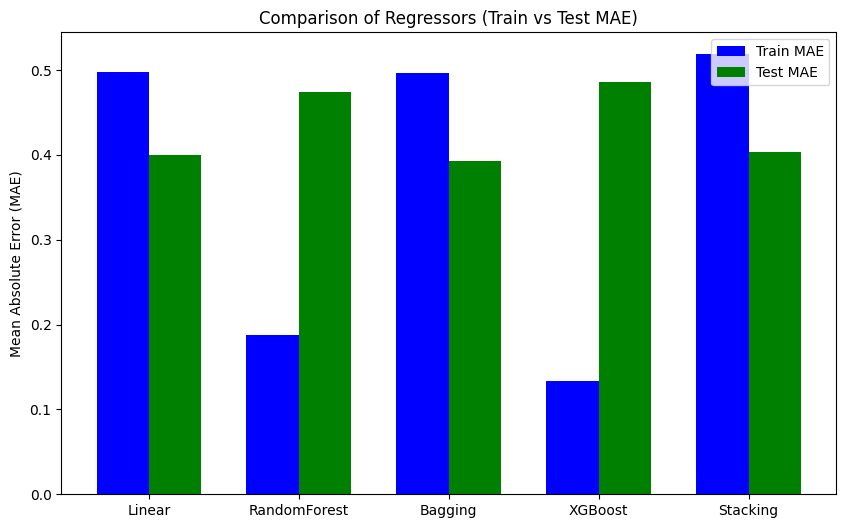

In [ ]:
names = list(train_mae.keys())
x = np.arange(len(names))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, list(train_mae.values()), width, label='Train MAE', color='blue')
plt.bar(x + width/2, list(test_mae.values()), width, label='Test MAE', color='green')

plt.xticks(x, names)
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Regressors (Train vs Test MAE)')
plt.legend()
plt.show()

a) Linear Regression:
The model performs quite well and stays consistent between train and test, showing good generalization and no overfitting.

b) Random Forest Regressor:
It fits very well on the training set (low train MAE) but performs worse on test data, which means it overfits.

c) Bagging Regressor:
It gives similar results to Linear Regression, slightly improving stability and generalization.

d) XGBoost Regressor:
It performs excellent on train but much worse on test — clear overfitting, meaning it learns the training data too well.

e) Stacking Regressor:
It performs about the same as Linear Regression — combining models didn’t significantly improve accuracy here.

#Question 12

Question a

In [ ]:
df_features = df.copy()

df_features['Month'] = df_features['Date'].dt.month
df_features['Day'] = df_features['Date'].dt.day

df_features

,Date,Open,High,Low,Close,Month,Day
0,2020-11-03 00:00:00-05:00,94.050003,94.050003,93.290001,93.550003,11,3
1,2020-11-04 00:00:00-05:00,93.089996,94.300003,93.089996,93.410004,11,4
2,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,11,5
3,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,11,6
4,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,11,9
...,...,...,...,...,...,...,...
1253,2025-10-28 00:00:00-04:00,98.750000,98.949997,98.570000,98.690002,10,28
1254,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001,10,29
1255,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,10,30
1256,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,10,31


The month can help the model capture seasonal or recurring patterns in the behavior.
For example, certain months may show typical rises or drops due to economic cycles, holidays, or policy announcements.

Question b

In [ ]:
for col in ['Open', 'High', 'Low', 'Close']:
    df_features[col] = np.log(1 + df_features[col].pct_change())

df_features[col] = df_features[col].replace([np.inf, -np.inf], np.nan)
df_features = df_features.dropna().reset_index(drop=True)
df_features[['Date', 'Open', 'High', 'Low', 'Close']].head()

,Date,Open,High,Low,Close
0,2020-11-04 00:00:00-05:00,-0.010260,0.002655,-0.002146,-0.001498
1,2020-11-05 00:00:00-05:00,0.002682,-0.007985,-0.006466,-0.009466
2,2020-11-06 00:00:00-05:00,-0.008284,-0.007834,-0.003357,-0.003247
3,2020-11-09 00:00:00-05:00,-0.003571,0.001507,-0.000543,0.005407
4,2020-11-10 00:00:00-05:00,0.005622,0.000108,0.005089,0.000216


Question c

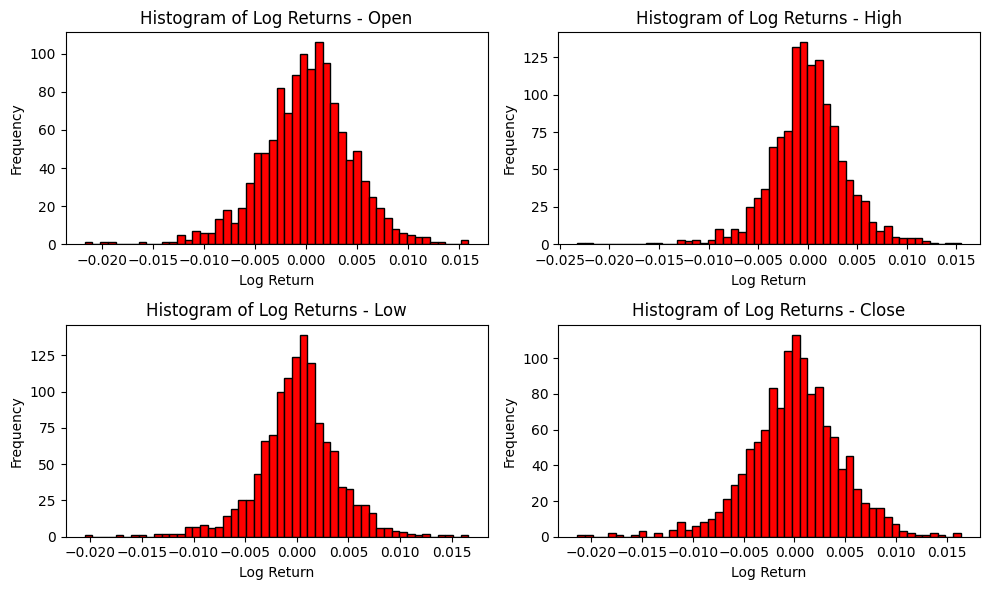

In [ ]:
plt.figure(figsize=(10, 6))
columns = ['Open', 'High', 'Low', 'Close']

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df_features[col], bins=50, color='red', edgecolor='black')
    plt.title(f'Histogram of Log Returns - {col}')
    plt.xlabel('Log Return')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

After we used the log return formula, the values are mostly around zero and look smoother.
This helps reduce big changes in the data and makes it easier for the model to learn and predict better.

Question d

The value is 0.01. This means that the price is expected to increase slightly.
Ct+1 = Ct * e^(log return) so the value will be about 0.96